# SERS and Raman data calibration and alignment

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tools.ramanflow.read_data import ReadData as rd
from tools.ramanflow.prep_data import PrepData as rpd

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

## Read the data

### Indene and Raman

#### Wavenumber support

#### Background

In [4]:
f_sup_785_650, back_650 = rd.read_data("data/20221111 Indene Carbendazim 785 Raman/BG 2min ctr650.tif")

In [5]:
f_sup_785_1250, back_1250 = rd.read_data("data/20221111 Indene Carbendazim 785 Raman/BG 2min ctr1250.tif")

In [6]:
f_sup_785_1850, back_1850 = rd.read_data("data/20221111 Indene Carbendazim 785 Raman/BG 2min ctr1850.tif")

In [ ]:
f_sup_785_650

#### Indene

In [ ]:
_, indene_650 = rd.read_data("data/20221111 Indene Carbendazim 785 Raman/Indene ctr650 2min 10x PlanN 32mW.tif")

In [ ]:
_, indene_1250 = rd.read_data("data/20221111 Indene Carbendazim 785 Raman/Indene ctr1250 2min 10x PlanN 32mW.tif")

In [ ]:
_, indene_1850 = rd.read_data("data/20221111 Indene Carbendazim 785 Raman/Indene ctr1850 2min 10x PlanN 32mW.tif")

#### Carbendazim Raman 

Pay attention that it is 2 min integration time. Probably for good comparison you will have to normalize it.

In [ ]:
_, car_650 = rd.read_data("data/20221111 Indene Carbendazim 785 Raman/Cab ctr650 2min 10x PlanN 32mW.tif")

In [ ]:
_, car_1250 = rd.read_data("data/20221111 Indene Carbendazim 785 Raman/Cab ctr1250 2min 10x PlanN 32mW.tif")

In [ ]:
_, car_1850 = rd.read_data("data/20221111 Indene Carbendazim 785 Raman/Cab ctr1850 2min 10x PlanN 32mW.tif")

#### Background for Thiacloprid and Acetamiprid; 20 secs 4 avg

In [ ]:
f_sup_background_20s_4avg, background_20s_4avg = rd.read_data("data/20220816 Analyte 532 Raman/background 20s 4avg.tif")

#### Thiacloprid Raman

In [ ]:
_, thia_raman_20s = rd.read_data("data/20220816 Analyte 532 Raman/No2 Thiacloprid powder/20s 4avg 100um fiber HWP42 MR-Newton ctr1400.tif")

#### Acetamiprid Raman

In [ ]:
_, aceta_raman_20s = rd.read_data("data/20220816 Analyte 532 Raman/No4 Acetamiprid powder/20s 4avg 100um fiber HWP42 MR-Newton ctr1400.tif")

### Analytes SERS

#### 1 - Carbendazim

In [4]:
f_sup_sers, car_batch1_3min_mapping = rd.read_data("data/20220422 SERS data generation/analyte 1/mapping50X50/1_3min_b3_50X50_spectral_mapping_1.tif")
f_sup_sers, car_batch2_3min_mapping = rd.read_data("data/20220422 SERS data generation/analyte 1/mapping50X50/1_3min_b3_50X50_spectral_mapping_2.tif")
f_sup_sers, car_batch3_3min_mapping = rd.read_data("data/20220422 SERS data generation/analyte 1/mapping50X50/1_3min_b3_50X50_spectral_mapping_3.tif")

 Remove cosmic rays

In [10]:
car_batch1_3min_mapping_no_cosmic = rpd.remove_cosmic_rays_old(car_batch1_3min_mapping, 10)
# car_batch2_3min_mapping_no_cosmic = rpd.remove_cosmic_rays_improved(car_batch2_3min_mapping, 10)
# car_batch3_3min_mapping_no_cosmic = rpd.remove_cosmic_rays(car_batch3_3min_mapping, 10)

In [ ]:
car_batch2_3min_mapping_no_cosmic_old = rpd.remove_cosmic_rays(car_batch2_3min_mapping, 10)

In [ ]:
# Save the data to a .npy file for later use to a current directory 
# np.save("car_batch2_3min_no_cosmic.npy", car_batch2_3min_mapping_no_cosmic)

# Do the same for the other batches
np.save("car_batch1_3min_no_cosmic.npy", car_batch1_3min_mapping_no_cosmic)
np.save("car_batch3_3min_no_cosmic.npy", car_batch3_3min_mapping_no_cosmic)

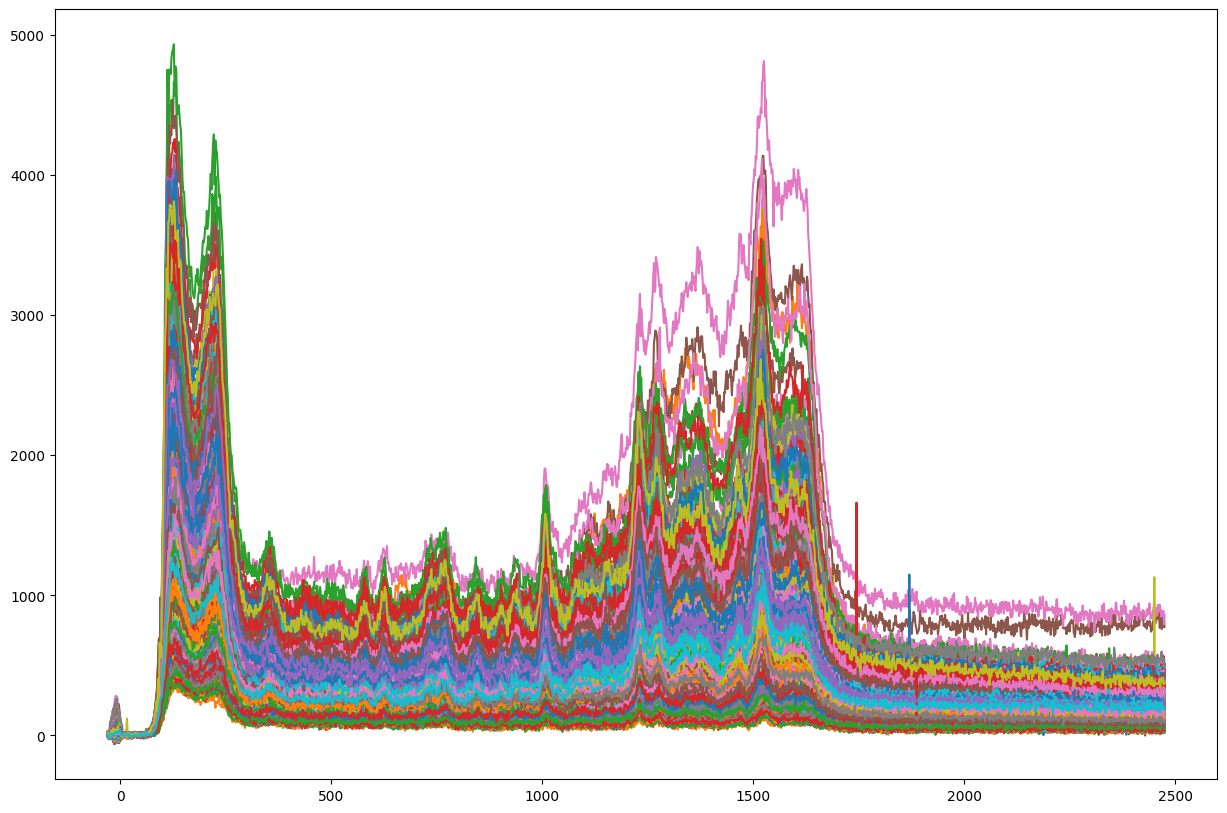

In [13]:
plt.figure(figsize=(15, 10))
for spectrum in car_batch1_3min_mapping_no_cosmic:
    plt.plot(f_sup_sers, spectrum)
plt.show()

In [5]:
# Take car_batch1_3min_mapping_no_cosmic as dataset and find 90th and 10th percentile
# Then use the 90th percentile as the upper limit and 10th percentile as the lower limit
# to plot the area graph of the dataset with the upper and lower limit 
car_batch1_3min_mapping_no_cosmic_upper = np.percentile(car_batch1_3min_mapping_no_cosmic, 90, axis=0)
car_batch1_3min_mapping_no_cosmic_lower = np.percentile(car_batch1_3min_mapping_no_cosmic, 10, axis=0)
# Do the same for all the other batches
car_batch2_3min_mapping_no_cosmic_upper = np.percentile(car_batch2_3min_mapping_no_cosmic, 90, axis=0)
car_batch2_3min_mapping_no_cosmic_lower = np.percentile(car_batch2_3min_mapping_no_cosmic, 10, axis=0)

car_batch3_3min_mapping_no_cosmic_upper = np.percentile(car_batch3_3min_mapping_no_cosmic, 90, axis=0)
car_batch3_3min_mapping_no_cosmic_lower = np.percentile(car_batch3_3min_mapping_no_cosmic, 10, axis=0)


plt.figure(figsize=(10, 5))
plt.plot(f_sup_sers, car_batch1_3min_mapping_no_cosmic_upper, label="Batch 1 90th percentile", color="red")
plt.plot(f_sup_sers, car_batch1_3min_mapping_no_cosmic_lower, label="Batch 2 10th percentile", color="red")
plt.plot(f_sup_sers, car_batch2_3min_mapping_no_cosmic_upper, label="Batch 2 90th percentile", color="blue")
plt.plot(f_sup_sers, car_batch2_3min_mapping_no_cosmic_lower, label="Batch 2 10th percentile", color="blue")
plt.plot(f_sup_sers, car_batch3_3min_mapping_no_cosmic_upper, label="Batch 3 90th percentile", color="green")
plt.plot(f_sup_sers, car_batch3_3min_mapping_no_cosmic_lower, label="Batch 3 10th percentile", color="green")
plt.fill_between(f_sup_sers, car_batch1_3min_mapping_no_cosmic_upper, car_batch1_3min_mapping_no_cosmic_lower, alpha=0.5, color="red")
plt.fill_between(f_sup_sers, car_batch2_3min_mapping_no_cosmic_upper, car_batch2_3min_mapping_no_cosmic_lower, alpha=0.5, color="blue")
plt.fill_between(f_sup_sers, car_batch3_3min_mapping_no_cosmic_upper, car_batch3_3min_mapping_no_cosmic_lower, alpha=0.5, color="green")
plt.xlabel("Raman shift (cm$^{-1}$)")
plt.ylabel("Intensity (a.u.)")
plt.title("Area graph of the 90th and 10th percentile of the 3 batches of 3 min mapping")
plt.legend()
plt.show()
# plt.savefig("car_graph_3min_mapping.png", dpi=600)

NameError: name 'car_batch1_3min_mapping_no_cosmic' is not defined

In [ ]:
# Create a dataframe with f_sup_sers as the first column and batch 1 with no cosmic rays trasnposed as the rest of the columns 
# without naming the columns and add the row on the top with the list starting from 1 to 2501 excluding the first column
# df_car_batch1_3min_mapping_no_cosmic = pd.DataFrame(np.column_stack((f_sup_sers, car_batch1_3min_mapping_no_cosmic.T)), columns=np.arange(0, 2500))

# df_car_batch1_3min_mapping_no_cosmic = pd.DataFrame(np.column_stack((f_sup_sers, car_batch1_3min_mapping_no_cosmic.T)))

# Create a dataframe with f_sup_sers as the first column and batch 2 with no cosmic rays trasnposed as the rest of the columns
# without naming the columns
df_car_batch2_3min_mapping_no_cosmic = pd.DataFrame(np.column_stack((f_sup_sers, car_batch2_3min_mapping_no_cosmic.T)))

# Create a dataframe with f_sup_sers as the first column and batch 3 with no cosmic rays trasnposed as the rest of the columns
# without naming the columns
# df_car_batch3_3min_mapping_no_cosmic = pd.DataFrame(np.column_stack((f_sup_sers, car_batch3_3min_mapping_no_cosmic.T)))

# Save the dataframes as csv files with the name of the batch to current directory
# df_car_batch1_3min_mapping_no_cosmic.to_csv("car_batch1_3min_mapping_no_cosmic_with_header.csv", index=False, header=False)
df_car_batch2_3min_mapping_no_cosmic.to_csv("car_batch2_3min_mapping_no_cosmic_with_header.csv", index=False, header=False)
# df_car_batch3_3min_mapping_no_cosmic.to_csv("car_batch3_3min_mapping_no_cosmic.csv", index=False, header=False)

In [ ]:
# Give me a list of numbers between 0 and 2500
np.arange(0, 2500)

# save it to csv file


In [ ]:
car_df_batch1 = pd.DataFrame(car_batch1_3min_mapping.T)
car_df_batch2 = pd.DataFrame(car_batch2_3min_mapping.T)
car_df_batch3 = pd.DataFrame(car_batch3_3min_mapping.T)

car_df_batch1.to_csv("car_batch1_3min_mapping.csv")
car_df_batch2.to_csv("car_batch2_3min_mapping.csv")
car_df_batch3.to_csv("car_batch3_3min_mapping.csv")

In [ ]:
car_whole = np.vstack((car_batch1_3min_mapping, car_batch2_3min_mapping, car_batch3_3min_mapping))
car_whole_df = pd.DataFrame(car_whole.T)

car_whole_df.to_csv("car_whole_3min_mapping.csv")

#### 2 - Thiacloprid

In [ ]:
f_sup_sers, thia_batch1_3min_mapping = rd.read_data("data/20220421 SERS data generation/analyte 2/mapping 50X50/2_3min_b3_50X50_spectral_mapping_1.tif")
f_sup_sers, thia_batch2_3min_mapping = rd.read_data("data/20220421 SERS data generation/analyte 2/mapping 50X50/2_3min_b3_50X50_spectral_mapping_2.tif")
f_sup_sers, thia_batch3_3min_mapping = rd.read_data("data/20220421 SERS data generation/analyte 2/mapping 50X50/2_3min_b3_50X50_spectral_mapping_3.tif")

Remove cosmic rays

In [ ]:
thia_batch1_3min_mapping_no_cosmic = rpd.remove_cosmic_rays(thia_batch1_3min_mapping, 10)
thia_batch2_3min_mapping_no_cosmic = rpd.remove_cosmic_rays(thia_batch2_3min_mapping, 10)
thia_batch3_3min_mapping_no_cosmic = rpd.remove_cosmic_rays(thia_batch3_3min_mapping, 10)

# Take thia_batch1_3min_mapping_no_cosmic as dataset and find 90th and 10th percentile
# Then use the 90th percentile as the upper limit and 10th percentile as the lower limit
# to plot the area graph of the dataset with the upper and lower limit

thia_batch1_3min_mapping_no_cosmic_upper = np.percentile(thia_batch1_3min_mapping_no_cosmic, 90, axis=0)
thia_batch1_3min_mapping_no_cosmic_lower = np.percentile(thia_batch1_3min_mapping_no_cosmic, 10, axis=0)
# Do the same for batch 2 and batch 3
thia_batch2_3min_mapping_no_cosmic_upper = np.percentile(thia_batch2_3min_mapping_no_cosmic, 90, axis=0)
thia_batch2_3min_mapping_no_cosmic_lower = np.percentile(thia_batch2_3min_mapping_no_cosmic, 10, axis=0)

thia_batch3_3min_mapping_no_cosmic_upper = np.percentile(thia_batch3_3min_mapping_no_cosmic, 90, axis=0)
thia_batch3_3min_mapping_no_cosmic_lower = np.percentile(thia_batch3_3min_mapping_no_cosmic, 10, axis=0)

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(f_sup_sers, thia_batch1_3min_mapping_no_cosmic_upper, label="90th percentile", color="red")
plt.plot(f_sup_sers, np.mean(thia_batch1_3min_mapping_no_cosmic, axis=0), label="mean", color="black")
plt.plot(f_sup_sers, thia_batch1_3min_mapping_no_cosmic_lower, label="10th percentile", color="red")
# plt.plot(f_sup_sers, thia_batch2_3min_mapping_no_cosmic_upper, label="90th percentile", color="blue")
# plt.plot(f_sup_sers, thia_batch2_3min_mapping_no_cosmic_lower, label="10th percentile", color="blue")
# plt.plot(f_sup_sers, thia_batch3_3min_mapping_no_cosmic_upper, label="90th percentile", color="green")
# plt.plot(f_sup_sers, thia_batch3_3min_mapping_no_cosmic_lower, label="10th percentile", color="green")
plt.fill_between(f_sup_sers, thia_batch1_3min_mapping_no_cosmic_upper, thia_batch1_3min_mapping_no_cosmic_lower, alpha=0.5)
# plt.fill_between(f_sup_sers, thia_batch2_3min_mapping_no_cosmic_upper, thia_batch2_3min_mapping_no_cosmic_lower, alpha=0.5)
# plt.fill_between(f_sup_sers, thia_batch3_3min_mapping_no_cosmic_upper, thia_batch3_3min_mapping_no_cosmic_lower, alpha=0.5)
plt.xlabel("Raman shift (cm$^{-1}$)")
plt.ylabel("Intensity (a.u.)")
plt.title("Area graph of the 90th and 10th percentile of the 3 batches of 3 min mapping")
plt.legend()
plt.show()
# plt.savefig('thia_3min_mapping_area_graph.png', dpi=600)

In [ ]:
# Create a dataframe with f_sup_sers as the first column and batch 1 with no cosmic rays trasnposed as the rest of the columns 
# without naming the columns and add the row on the top with the list starting from 1 to 2501 excluding the first column
df_thia_batch1_3min_mapping_no_cosmic = pd.DataFrame(np.column_stack((f_sup_sers, thia_batch1_3min_mapping_no_cosmic.T)))

# df_car_batch1_3min_mapping_no_cosmic = pd.DataFrame(np.column_stack((f_sup_sers, thia_batch1_3min_mapping_no_cosmic.T)))

# Create a dataframe with f_sup_sers as the first column and batch 2 with no cosmic rays trasnposed as the rest of the columns
# without naming the columns
df_thia_batch2_3min_mapping_no_cosmic = pd.DataFrame(np.column_stack((f_sup_sers, thia_batch2_3min_mapping_no_cosmic.T)))

# Create a dataframe with f_sup_sers as the first column and batch 3 with no cosmic rays trasnposed as the rest of the columns
# without naming the columns
df_thia_batch3_3min_mapping_no_cosmic = pd.DataFrame(np.column_stack((f_sup_sers, thia_batch3_3min_mapping_no_cosmic.T)))

# Save the dataframes as csv files with the name of the batch to current directory
df_thia_batch1_3min_mapping_no_cosmic.to_csv("thia_batch1_3min_mapping_no_cosmic_with_header.csv", index=False, header=False)
df_thia_batch2_3min_mapping_no_cosmic.to_csv("thia_batch2_3min_mapping_no_cosmic_with_header.csv", index=False, header=False)
df_thia_batch3_3min_mapping_no_cosmic.to_csv("thia_batch3_3min_mapping_no_cosmic_with_header.csv", index=False, header=False)

In [ ]:
thia_batch3_3min_mapping_no_cosmic = rpd.remove_cosmic_rays(thia_batch3_3min_mapping_no_cosmic, 10)

In [ ]:
# plot all the data from car_batch2_3min_mapping_no_cosmic with a loop
# use rows as individual plots

plt.figure(figsize=(10, 5))
for i in range(len(car_batch2_3min_mapping_no_cosmic)):
    plt.plot(f_sup_sers, thia_batch3_3min_mapping_no_cosmic[i])

plt.show()

In [ ]:
# read the data from car_batch1_3min_mapping_no_cosmic.npy
car_batch1_3min_mapping_no_cosmic = np.load("car_batch1_3min_no_cosmic.npy")

In [ ]:
# plot all the data from car_batch2_3min_mapping_no_cosmic with imshow
# use rows as individual plots

# plt.figure(figsize=(10, 5))
# plt.imshow(car_batch1_3min_mapping_no_cosmic, aspect="auto")
# plt.show()

# Show all the data from car_batch1_3min_mapping_no_cosmic with imshow 
# and show it as a heatmap

plt.figure(figsize=(10, 5))
plt.imshow(car_batch1_3min_mapping_no_cosmic[:, 170:], aspect="auto", cmap="magma")
plt.show()

In [ ]:
# Save thia_batch*_3min_mapping_no_cosmic as .npy files to current directory
np.save("thia_batch1_3min_mapping_no_cosmic.npy", thia_batch1_3min_mapping_no_cosmic)
np.save("thia_batch2_3min_mapping_no_cosmic.npy", thia_batch2_3min_mapping_no_cosmic)
np.save("thia_batch3_3min_mapping_no_cosmic.npy", thia_batch3_3min_mapping_no_cosmic)

#### 4 - Acetamiprid

In [ ]:
f_sup_sers, aceta_batch1_3min_mapping = rd.read_data("data/20220421 SERS data generation/analyte 4/mapping50X50/4_3min_b3_50X50_spectral_mapping_1.tif")
f_sup_sers, aceta_batch2_3min_mapping = rd.read_data("data/20220421 SERS data generation/analyte 4/mapping50X50/4_3min_b3_50X50_spectral_mapping_2.tif")
f_sup_sers, aceta_batch3_3min_mapping = rd.read_data("data/20220421 SERS data generation/analyte 4/mapping50X50/4_3min_b3_50X50_spectral_mapping_3.tif")

Remove cosmic rays

In [ ]:
# Remove cosmic rays from all 3 batches of aceta
aceta_batch1_3min_mapping_no_cosmic = rpd.remove_cosmic_rays(aceta_batch1_3min_mapping, 10)
aceta_batch2_3min_mapping_no_cosmic = rpd.remove_cosmic_rays(aceta_batch2_3min_mapping, 10)
aceta_batch3_3min_mapping_no_cosmic = rpd.remove_cosmic_rays(aceta_batch3_3min_mapping, 10)

# Take aceta_batch1_3min_mapping_no_cosmic as dataset and find 90th and 10th percentile
# Then use the 90th percentile as the upper limit and 10th percentile as the lower limit
# to plot the area graph of the dataset with the upper and lower limit

aceta_batch1_3min_mapping_no_cosmic_upper = np.percentile(aceta_batch1_3min_mapping_no_cosmic, 90, axis=0)
aceta_batch1_3min_mapping_no_cosmic_lower = np.percentile(aceta_batch1_3min_mapping_no_cosmic, 10, axis=0)
# Do the same for batch 2 and batch 3
aceta_batch2_3min_mapping_no_cosmic_upper = np.percentile(aceta_batch2_3min_mapping_no_cosmic, 90, axis=0)
aceta_batch2_3min_mapping_no_cosmic_lower = np.percentile(aceta_batch2_3min_mapping_no_cosmic, 10, axis=0)

aceta_batch3_3min_mapping_no_cosmic_upper = np.percentile(aceta_batch3_3min_mapping_no_cosmic, 90, axis=0)
aceta_batch3_3min_mapping_no_cosmic_lower = np.percentile(aceta_batch3_3min_mapping_no_cosmic, 10, axis=0)

plt.figure(figsize=(10, 5))
plt.plot(f_sup_sers, aceta_batch1_3min_mapping_no_cosmic_upper, label="90th percentile", color="red")
plt.plot(f_sup_sers, aceta_batch1_3min_mapping_no_cosmic_lower, label="10th percentile", color="red")
plt.plot(f_sup_sers, aceta_batch2_3min_mapping_no_cosmic_upper, label="90th percentile", color="blue")
plt.plot(f_sup_sers, aceta_batch2_3min_mapping_no_cosmic_lower, label="10th percentile", color="blue")
plt.plot(f_sup_sers, aceta_batch3_3min_mapping_no_cosmic_upper, label="90th percentile", color="green")
plt.plot(f_sup_sers, aceta_batch3_3min_mapping_no_cosmic_lower, label="10th percentile", color="green")
plt.fill_between(f_sup_sers, aceta_batch1_3min_mapping_no_cosmic_upper, aceta_batch1_3min_mapping_no_cosmic_lower, alpha=0.5)
plt.fill_between(f_sup_sers, aceta_batch2_3min_mapping_no_cosmic_upper, aceta_batch2_3min_mapping_no_cosmic_lower, alpha=0.5)
plt.fill_between(f_sup_sers, aceta_batch3_3min_mapping_no_cosmic_upper, aceta_batch3_3min_mapping_no_cosmic_lower, alpha=0.5)
plt.xlabel("Raman shift (cm$^{-1}$)")
plt.ylabel("Intensity (a.u.)")
plt.title("Area graph of the 90th and 10th percentile of the 3 batches of 3 min mapping")
plt.legend()
# plt.show()
plt.savefig('aceta_3min_mapping_area_graph.png', dpi=600)

In [ ]:
# Create a dataframe with f_sup_sers as the first column and batch 1 with no cosmic rays trasnposed as the rest of the columns 
# without naming the columns and add the row on the top with the list starting from 1 to 2501 excluding the first column
df_aceta_batch1_3min_mapping_no_cosmic = pd.DataFrame(np.column_stack((f_sup_sers, aceta_batch1_3min_mapping_no_cosmic.T)))

# df_car_batch1_3min_mapping_no_cosmic = pd.DataFrame(np.column_stack((f_sup_sers, thia_batch1_3min_mapping_no_cosmic.T)))

# Create a dataframe with f_sup_sers as the first column and batch 2 with no cosmic rays trasnposed as the rest of the columns
# without naming the columns
df_aceta_batch2_3min_mapping_no_cosmic = pd.DataFrame(np.column_stack((f_sup_sers, aceta_batch2_3min_mapping_no_cosmic.T)))

# Create a dataframe with f_sup_sers as the first column and batch 3 with no cosmic rays trasnposed as the rest of the columns
# without naming the columns
df_aceta_batch3_3min_mapping_no_cosmic = pd.DataFrame(np.column_stack((f_sup_sers, aceta_batch3_3min_mapping_no_cosmic.T)))

# Save the dataframes as csv files with the name of the batch to current directory
df_aceta_batch1_3min_mapping_no_cosmic.to_csv("aceta_batch1_3min_mapping_no_cosmic_with_header.csv", index=False, header=False)
df_aceta_batch2_3min_mapping_no_cosmic.to_csv("aceta_batch2_3min_mapping_no_cosmic_with_header.csv", index=False, header=False)
df_aceta_batch3_3min_mapping_no_cosmic.to_csv("aceta_batch3_3min_mapping_no_cosmic_with_header.csv", index=False, header=False)

In [ ]:
aceta_batch3_3min_mapping_no_cosmic = rpd.remove_cosmic_rays(aceta_batch3_3min_mapping_no_cosmic, 15)

In [ ]:
# plot all the data from car_batch2_3min_mapping_no_cosmic with a loop
# use rows as individual plots

plt.figure(figsize=(10, 5))
for i in range(len(car_batch2_3min_mapping_no_cosmic)):
    plt.plot(f_sup_sers, aceta_batch3_3min_mapping_no_cosmic[i])

plt.show()

In [ ]:
# Save aceta all batches into a multiple .npy files
np.save("aceta_batch1_3min_mapping_no_cosmic.npy", aceta_batch1_3min_mapping_no_cosmic)
np.save("aceta_batch2_3min_mapping_no_cosmic.npy", aceta_batch2_3min_mapping_no_cosmic)
np.save("aceta_batch3_3min_mapping_no_cosmic.npy", aceta_batch3_3min_mapping_no_cosmic)

## Visualize the data

#### Carbendazim: Raman and SERS

In [ ]:
y_pos = 30000  # y position of the text
rotation_angle = 65  # angle of the text rotation

In [ ]:
# Indene peaks
indene_peaks = [203, 381, 534, 592, 730, 861, 1019, 1068,
                1153, 1205, 1226, 1288, 1312, 1361, 1457, 1588, 1609]

indene_true_peaks = [180, 340, 480, 540, 680, 815, 989, 1048]

# text_pos= [730, 1018, 1205, 1361, 1393, 1458, 1553, 1610]
text_pos = [730, 1018, 1205, 1553]
# text = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
text = ['A', 'B', 'C', 'G']

In [ ]:
# Carbendazim peaks
carbendazim_peaks = [617, 723, 960, 1018, 1473]
carbendazim_peaks_2 = 1260
carbendazim_peaks_3 = 1270

In [ ]:
# Used only 650 and 1250 because Indene peaks went only till 1600
plt.figure(figsize=(10,5))
# plt.plot(f_sup_785_650, indene_650 + 10000, color='green')
# plt.plot(f_sup_785_1250 + 40, indene_1250 + 10000, color='green')
plt.plot(f_sup_785_whole[200:], indene_whole[200:], color='black')
# plt.vlines(x=indene_peaks, ymin=0, ymax=0.6, colors="k", linestyles="dashed")
# plt.vlines(x=indene_true_peaks, ymin=16000, ymax=22500, color='r', linestyles='dashed')
# for peak_pos, peak_label in enumerate(indene_peaks):
#     plt.text(indene_peaks[peak_pos], y_pos, str(peak_label), rotation=rotation_angle)

# for true_peak in indene_true_peaks:
#     plt.text(x=true_peak, y=22500, s=str(true_peak), rotation=rotation_angle, color="red")
    
plt.vlines(x=text_pos, ymin=0, ymax=0.56, colors="k", linestyles="dashed")
for idx, true_peak in enumerate(text_pos):
    plt.text(x=true_peak, y=0.56, s=text[idx], color='black')
    
# plt.vlines(x=[1100], y=)
plt.rc('font', size=15)
plt.title("Indene Raman")
plt.xlabel('Raman Shift cm^-1')
plt.ylabel('Intensity counts')
plt.yticks([])
plt.savefig("plots/indene_raman.png", dpi=500)

In [ ]:
car_whole_norm_sers_mean = np.mean(car_batch1_3min_mapping, axis=0) / np.max(np.mean(car_batch1_3min_mapping, axis=0))

In [ ]:
# Read the data from the csv file located in the directory called 'csv_files'. Filename is 'car_batch1_3min_mapping_no_cosmic_with_header.csv'
# and save it as a dataframe called df_car_batch1_3min_mapping_no_cosmic
df_car_batch1_3min_mapping_no_cosmic = pd.read_csv("csv_files/car_batch1_3min_mapping_no_cosmic.csv", header=None)

In [ ]:
df_car_batch1_3min_mapping_no_cosmic.head()

In [ ]:
# Take everything from the dataframe except the first column and row and save it as a numpy array called car_batch1_3min_mapping_no_cosmic
car_batch1_3min_mapping_no_cosmic = df_car_batch1_3min_mapping_no_cosmic.iloc[1:, 1:].to_numpy()

In [ ]:
car_batch1_3min_mapping_no_cosmic.shape

In [ ]:
# Save the mean along the rows of the car_batch1_3min_mapping as one column as a csv file
np.savetxt("car_batch1_3min_mapping_mean.csv", np.mean(car_batch1_3min_mapping_no_cosmic, axis=0), delimiter=",") 

In [ ]:
y_max = 1.35

In [ ]:
# Save f_sup_sers as a csv file as one column
np.savetxt("f_sup_sers.csv", f_sup_sers, delimiter=",")

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(f_sup_785_whole[400:], car_whole[400:] * 1.3, color='red', linestyle='--')
plt.plot(f_sup_sers[180:1400], car_whole_norm_sers_mean[180:1400], color='black')

plt.vlines(x=carbendazim_peaks, ymin=0, ymax=y_max, colors="k", linestyles="dashed")    
for idx, true_peak in enumerate(carbendazim_peaks):
    plt.text(x=true_peak, y=y_max, s=str(true_peak), rotation=rotation_angle, color='black')

# plt.vlines(x=carbendazim_peaks_2, ymin=0, ymax=y_max, colors="k", linestyles="dashed")
# plt.text(x=carbendazim_peaks_2 - 50, y=y_max, s=str(carbendazim_peaks_2), rotation=rotation_angle, color='black')
# plt.vlines(x=carbendazim_peaks_3, ymin=0, ymax=y_max, colors="k", linestyles="dashed")
# plt.text(x=carbendazim_peaks_3, y=y_max, s=str(carbendazim_peaks_3), rotation=rotation_angle, color='black')

    
plt.rc('font', size=12)
plt.title("Comparison of Carbendazim Raman and SERS signals")
plt.xlabel('Raman Shift cm^-1')
plt.ylabel('Intensity counts')
plt.yticks([])
# plt.savefig("carbendazim_raman_sers_comparison.png", dpi=500)

In [ ]:
car_whole = np.concatenate((car_650[:1110], car_1250, car_1850[650:]))
# car_whole = car_whole / np.max(car_whole)
car_whole = rpd.remove_cosmic_rays(car_whole, 10)

In [ ]:
indene_whole = np.concatenate((indene_650[:1110], indene_1250, indene_1850[650:] - 850))
# indene_whole = indene_whole / np.max(indene_whole)
indene_whole = rpd.remove_cosmic_rays(indene_whole, 10)

In [ ]:
f_sup_785_whole = np.concatenate((f_sup_785_650[:1110], f_sup_785_1250, f_sup_785_1850[650:]))

In [ ]:
background_785_whole = np.concatenate((back_650[:1110], back_1250, back_1850[650:]))

# Save background_785_whole as a csv file as one column
np.savetxt("background_785_whole.csv", background_785_whole, delimiter="\n")

In [ ]:
car_whole.shape

In [ ]:
# Plot car_whole

#### Thiacloprid: Raman and SERS

In [ ]:
# Thiacloprid peaks
thia_peaks = [588, 639, 688, 815, 1009, 1096, 1424, 1585]


In [ ]:
thia_raman_norm = thia_raman_20s /  np.max(thia_raman_20s)
thia_sers_mean_norm = np.mean(thia_batch1_3min_mapping, axis=0) / np.max(np.mean(thia_batch1_3min_mapping, axis=0))

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(f_sup_background_20s_4avg[160:], thia_raman_norm[160:] + 0.7, color='black')
plt.plot(f_sup_sers[160:], thia_sers_mean_norm[160:], color='black')
plt.vlines(x=thia_peaks, ymin=0, ymax=1.7, colors="k", linestyles="dashed")    
for idx, true_peak in enumerate(thia_peaks):
    plt.text(x=true_peak, y=1.6, s=str(true_peak), rotation=rotation_angle, color='black')
    
plt.rc('font', size=11)
plt.title("Thiacloprid Raman")
plt.xlabel('Raman Shift cm^-1')
plt.ylabel('Intensity counts')
plt.yticks([])
plt.savefig("plots/comparison_thiacloprid_raman_sers.png", dpi=500)

#### Acetamiprid: Raman and SERS

In [ ]:
# Acetamiprid peaks
aceta_peaks = [634, 827, 1111, 2164]

In [ ]:
aceta_raman_norm = aceta_raman_20s /  np.max(aceta_raman_20s)
aceta_sers_mean_norm = np.mean(aceta_batch1_3min_mapping, axis=0) / np.max(np.mean(aceta_batch1_3min_mapping, axis=0))

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(f_sup_background_20s_4avg[160:], aceta_raman_norm[160:] + 1, color='black')
plt.plot(f_sup_sers[160:], aceta_sers_mean_norm[160:], color='black')
plt.vlines(x=aceta_peaks, ymin=0, ymax=2, colors="k", linestyles="dashed")    
for idx, true_peak in enumerate(aceta_peaks):
    plt.text(x=true_peak, y=2, s=str(true_peak), rotation=rotation_angle, color='black')
    
plt.rc('font', size=11)
plt.title("Acetamiprid Raman")
plt.xlabel('Raman Shift cm^-1')
plt.ylabel('Intensity counts')
plt.yticks([])
plt.savefig("plots/comparison_acetamiprid_raman_sers.png", dpi=500)